# IPL first innings score prediction

In [66]:
import pandas as pd
import pickle

# load dataset
df = pd.read_csv("F:\AI - ML Projects\IPL Score Prediction\ipl.csv")

In [2]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df.shape

(76014, 15)

# Data Cleaning

In [4]:
# removing unwanted columns
remove_columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=remove_columns, axis=1, inplace=True)

In [5]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
# Keeping only that teams which are playing right now
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 
                 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [8]:
# updating dataset with current teams only
df = df[(df['bat_team'].isin(current_teams)) & (df['bowl_team'].isin(current_teams))]

In [9]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [10]:
df.shape

(53811, 9)

In [11]:
# Now, we assume that minimum 5 over batting is needed for predicting final score
# Removing the first 5 overs data in every match

df = df[df['overs'] >= 5.0]

In [12]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [13]:
df.shape

(40108, 9)

In [14]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [15]:
df.dtypes

date               object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
dtype: object

In [16]:
# Converting the 'date' column from string into datetime object

from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [17]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


# Data Preprocessing

In [18]:
# Converting categorical features using OnehotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [19]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# Now just reformating our columns by rearranging
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [21]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [22]:
# Splitting the data into train and test set
# 
# Here, we remove 'total' column bcoz we need to predict this column and predicted column should not be 
#       included on train and test dataset 
# 
# MIMP --> This is a time-series kind of data, so we taken data of before 2017 year for training set
#          And we taken data of after 2017 year for testing set
# 
# For every time-series types of data, we'll do same thing. We split data based on time itself

X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [23]:
# Now for the output prediction, we use our target column 'total'

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [24]:
# Removing the 'date' column
# We need the 'date' column just for splitting our data into train and test dataset

X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Model Building

# Linear Regression

In [50]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
prediction = regressor.predict(X_test)

C:\Users\Dell\AppData\Local\Temp/ipykernel_7336/382743513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<AxesSubplot:ylabel='Density'>

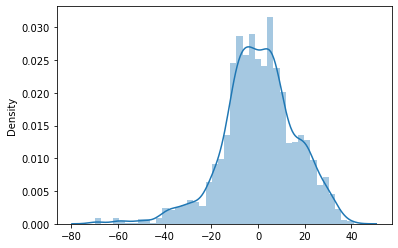

In [56]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [57]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.121567266806155
MSE: 251.32041402868094
RMSE: 15.853088469717216


# Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [29]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}  # 10^-15
ridge_regressor = GridSearchCV(ridge, 
                               parameters, 
                               scoring='neg_mean_squared_error', 
                               cv=5)

ridge_regressor.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.37583e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.38616e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.38035e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.54005e-18): result may not be accurate.
  return linalg.solve(A, 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487926


In [31]:
prediction = ridge_regressor.predict(X_test)

In [32]:
print(prediction)

[172.04976684 175.20021989 174.59538295 ... 100.41375553  99.84095094
  93.18090251]


C:\Users\Dell\AppData\Local\Temp/ipykernel_7336/382743513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<AxesSubplot:ylabel='Density'>

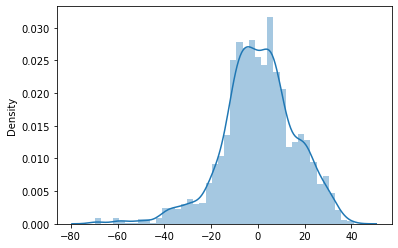

In [35]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [39]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_absolute_error(y_test, prediction)))

Mean Absolute Error (MAE): 12.117294527005017
Mean Squared Error (MSE): 251.03172964112733
Root Mean Absolute Error (RMSE): 3.480990452012906


# Lasso Regression

Lasso and Ridge, both are almost same. Just small change is there

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [41]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,
                               parameters,
                               scoring='neg_mean_squared_error',
                               cv=5)

lasso_regressor.fit(X_train,y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.501e+06, tolerance: 2.530e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.471e+06, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

{'alpha': 1}
-320.8221491835715


In [45]:
prediction = lasso_regressor.predict(X_test)

C:\Users\Dell\AppData\Local\Temp/ipykernel_7336/382743513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<AxesSubplot:ylabel='Density'>

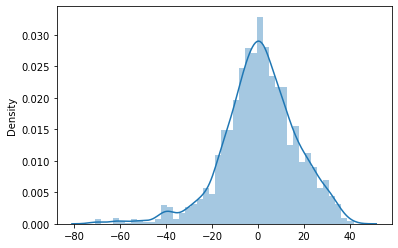

In [46]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [47]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_absolute_error(y_test, prediction)))

Mean Absolute Error (MAE): 12.213583996827493
Mean Squared Error (MSE): 262.3653827960697
Root Mean Squared Error (RMSE): 3.4947938418206435


## For Saving the Model, 
Primarly, We use 2 library

    1. Joblib -> Faster in saving large NumPy arrays
    2. Pickle -> Faster with large collections of Python objects 

In [61]:
# Here, we are dealing with objects, so we're using 'Pickle' library

# Creating a pickle file for the classifier

filename = 'first_innings_score_LinRg_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))  # wb -> write binary

In [62]:
# Here, we are dealing with objects, so we're using 'Pickle' library

# Creating a pickle file for the classifier

filename = 'first_innings_score_RidgeRg_model.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))  # wb -> write binary

In [63]:
# Here, we are dealing with objects, so we're using 'Pickle' library

# Creating a pickle file for the classifier

filename = 'first_innings_score_LassoRg_model.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))  # wb -> write binary